**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [249]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [250]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

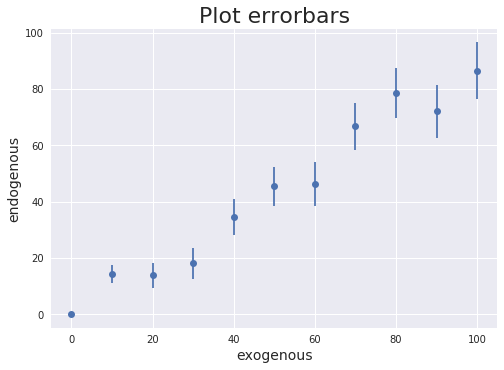

In [251]:
x = np.arange(0, 101, 10)
y = line(0.9, x, 0, errors)
pl.style.use('seaborn')
pl.errorbar(x,y, yerr=errors(x), marker='o', linestyle='')
pl.title("Plot errorbars", fontsize=22)
pl.xlabel('exogenous', fontsize=14)
pl.ylabel('endogenous', fontsize=14);

Figure 1. Plot of exogenuous and endogenous variables with 0.9 slope, 0 intercept and randomly generated error values.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [252]:
df = pd.DataFrame({'x': x, 'y': y})
display(df)

,x,y
0,0,0.000000
1,10,14.150382
2,20,13.836657
3,30,18.116590
4,40,34.523959
5,50,45.387019
6,60,46.321112
7,70,66.722269
8,80,78.505332
9,90,72.010552


In [253]:
pd.DataFrame(sm.add_constant(x), columns=["const","x"])

,const,x
0,1.0,0.0
1,1.0,10.0
2,1.0,20.0
3,1.0,30.0
4,1.0,40.0
5,1.0,50.0
6,1.0,60.0
7,1.0,70.0
8,1.0,80.0
9,1.0,90.0


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [254]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     979.1
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           2.61e-11
Time:                        11:18:40   Log-Likelihood:                -33.741
No. Observations:                  11   AIC:                             69.48
Df Residuals:                      10   BIC:                             69.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8695      0.028     31.291      0.000         0.808     0.931
==============================================================================
Omnibus:                        0.643   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.574
Skew:                           0.170   Prob(JB):                        0.750
Kurtosis:                       1.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
#THE RIGHT WAY
smfit2 = smf.OLS(y, sm.add_constant(x)).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     258.7
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           6.15e-08
Time:                        11:18:40   Log-Likelihood:                -33.714
No. Observations:                  11   AIC:                             71.43
Df Residuals:                       9   BIC:                             72.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.6781      3.234     -0.210      0.839        -7.994     6.638
x1             0.8792      0.055     16.083      0.000         0.756     1.003
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.619
Skew:                           0.130   Prob(JB):                        0.734
Kurtosis:                       1.867   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discuss differences
* The right way of OLS model which fitted without constant value has lower R-squared value comparing to the wrong way of OLS model with constant value. The effect of constant value is different in each case for fitting model. It shoud be infered by researcher with considering relationship between independent variable and dependent variable by reasoning. At this case, the constant value does not affect much on model's goodness of fit.

# 4. plot the data (as points) and both statsmodels fits

In [256]:
smfit2.params

array([-0.67807316,  0.87921708])

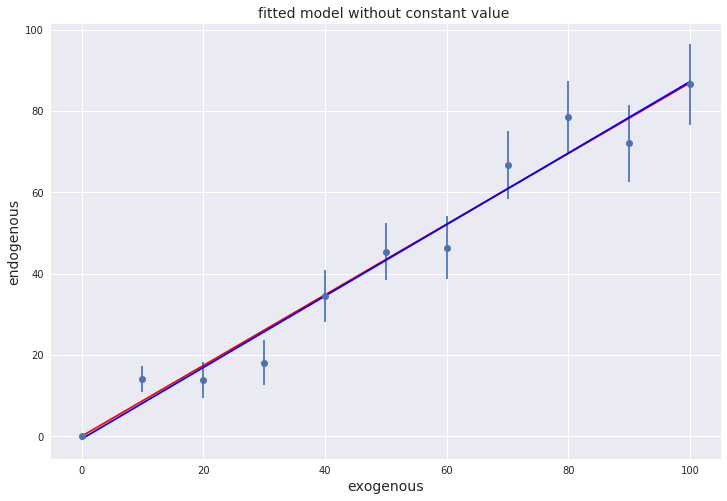

In [257]:
pl.style.use('seaborn')

f, ax = pl.subplots(figsize=(12,8))
ax.errorbar(x,y, yerr=errors(x), marker='o', linestyle='')
ax.plot(x, x * smfit.params[0], 'r-')
ax.plot(x, x * smfit2.params[1] + smfit2.params[0], 'b-')
ax.set_title("fitted model without constant value ", fontsize=14)
ax.set_xlabel('exogenous', fontsize=14)
ax.set_ylabel('endogenous', fontsize=14);

Figure 2. Plot both model, one of which is fitted model without constant value and the other is fitted model with constant value.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

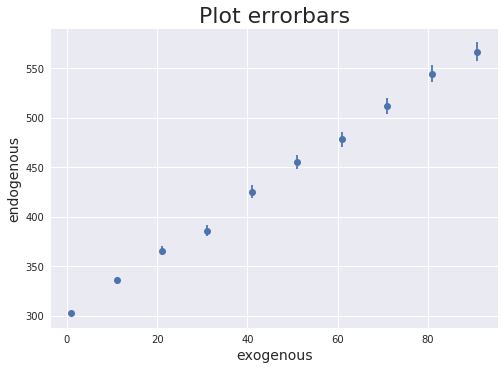

In [258]:
x = np.arange(1, 101, 10)
y = line(3, x, 100*3, errors)
pl.style.use('seaborn')
pl.errorbar(x,y, yerr=errors(x), marker='o', linestyle='')
pl.title("Plot errorbars", size=22)
pl.xlabel('exogenous', fontsize=14)
pl.ylabel('endogenous', fontsize=14);

Figure 3. Plot of exogenuous and endogenous variables with 3 slope, 100*slope intercept and randomly generated error values.

# 6. repeat step 3

In [259]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     61.02
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           2.68e-05
Time:                        11:18:41   Log-Likelihood:                -64.920
No. Observations:                  10   AIC:                             131.8
Df Residuals:                       9   BIC:                             132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             7.6656      0.981      7.811      0.000         5.446     9.886
==============================================================================
Omnibus:                        0.921   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.611
Skew:                          -0.009   Prob(JB):                        0.737
Kurtosis:                       1.789   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
#THE RIGHT WAY
smfit2 = smf.OLS(y, sm.add_constant(x)).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4770.
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           2.15e-12
Time:                        11:18:41   Log-Likelihood:                -26.637
No. Observations:                  10   AIC:                             57.27
Df Residuals:                       8   BIC:                             57.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        301.3768      2.318    130.026      0.000       296.032   306.722
x1             2.9517      0.043     69.063      0.000         2.853     3.050
==============================================================================
Omnibus:                        1.440   Durbin-Watson:                   2.719
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.022
Skew:                          -0.674   Prob(JB):                        0.600
Kurtosis:                       2.203   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [261]:
wls = smf.WLS(y,x, weights= 1 / errors(x)).fit()
wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            WLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     17.70
Date:                Fri, 16 Nov 2018   Prob (F-statistic):            0.00228
Time:                        11:18:41   Log-Likelihood:                -69.739
No. Observations:                  10   AIC:                             141.5
Df Residuals:                       9   BIC:                             141.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             8.2017      1.949      4.207      0.002         3.792    12.612
==============================================================================
Omnibus:                        7.903   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.247
Skew:                           1.304   Prob(JB):                        0.197
Kurtosis:                       3.995   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

NameError: name 'smfitDoneRight' is not defined

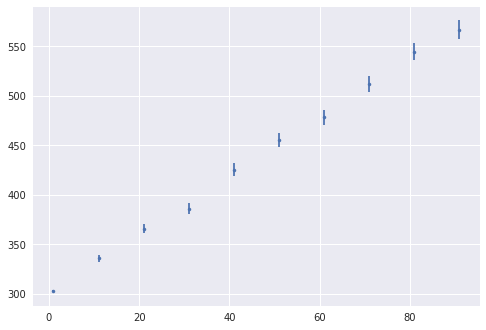

In [262]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();